In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Load the diabetes dataset
diabetes_data = pd.read_csv('diabetes.csv')

In [4]:
#Pre-processing
# Check for null values in the dataset
null_values = diabetes_data.isnull().sum()

# Display null values
print("Null values in the dataset:")
print(null_values)

Null values in the dataset:
Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


In [5]:
# Set a seed for reproducibility
np.random.seed(50)

In [6]:
# Random sample of 25 observations
sample_size = 25
sample = diabetes_data.sample(sample_size)

In [7]:
# Compare mean and highest Glucose values with population statistics
data_mean = diabetes_data['Glucose'].mean()
data_max = diabetes_data['Glucose'].max()

sample_mean = sample['Glucose'].mean()
sample_max = sample['Glucose'].max()
print("Population Mean: ", data_mean)
print("Sample Mean: ", sample_mean)
print("Population Max: ", data_max)
print("Sample Max: ", sample_max)

Population Mean:  120.89453125
Sample Mean:  113.92
Population Max:  199
Sample Max:  196


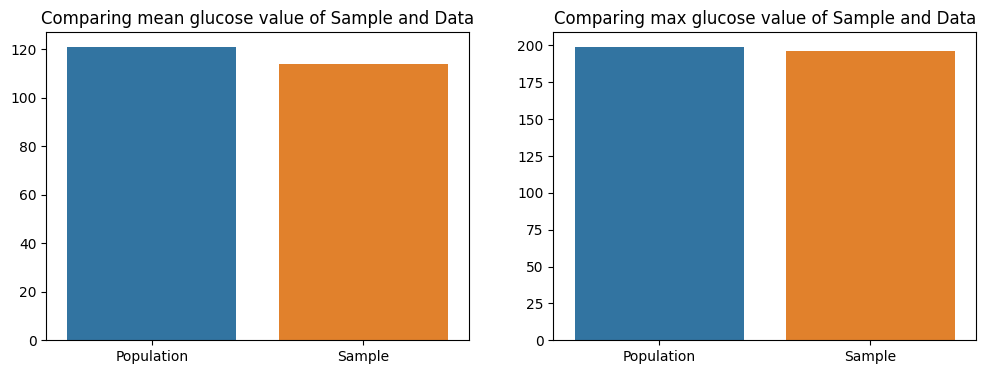

In [8]:
# Plot comparison
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

sns.barplot(x=['Population', 'Sample'], y=[data_mean, sample_mean], ax=axes[0])
axes[0].set_title('Comparing mean glucose value of Sample and Data')

sns.barplot(x=['Population', 'Sample'], y=[data_max, sample_max], ax=axes[1])
axes[1].set_title('Comparing max glucose value of Sample and Data')

plt.show()

In [9]:
# b) Find the 98th percentile of BMI
data_bmi = np.percentile(diabetes_data['BMI'], 98)
sample_bmi = np.percentile(sample['BMI'], 98)

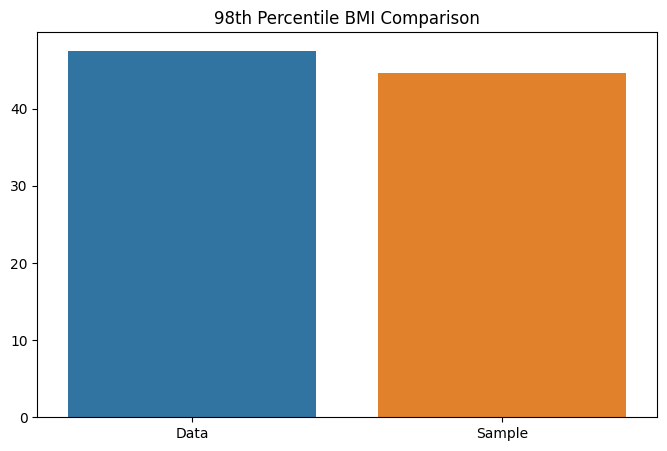

In [10]:
# Plot comparison
plt.figure(figsize=(8, 5))
sns.barplot(x=['Data', 'Sample'], y=[data_bmi, sample_bmi])
plt.title('98th Percentile BMI Comparison')
plt.show()

In [11]:
# Bootstrap sampling for BloodPressure
num_of_samples = 500
sample_size = 150

means = []
stds = []
percentiles = []

for _ in range(num_of_samples):
    bootstrap_sample = diabetes_data['BloodPressure'].sample(sample_size, replace=True)
    means.append(bootstrap_sample.mean())
    stds.append(bootstrap_sample.std())
    percentiles.append(np.percentile(bootstrap_sample, 95))

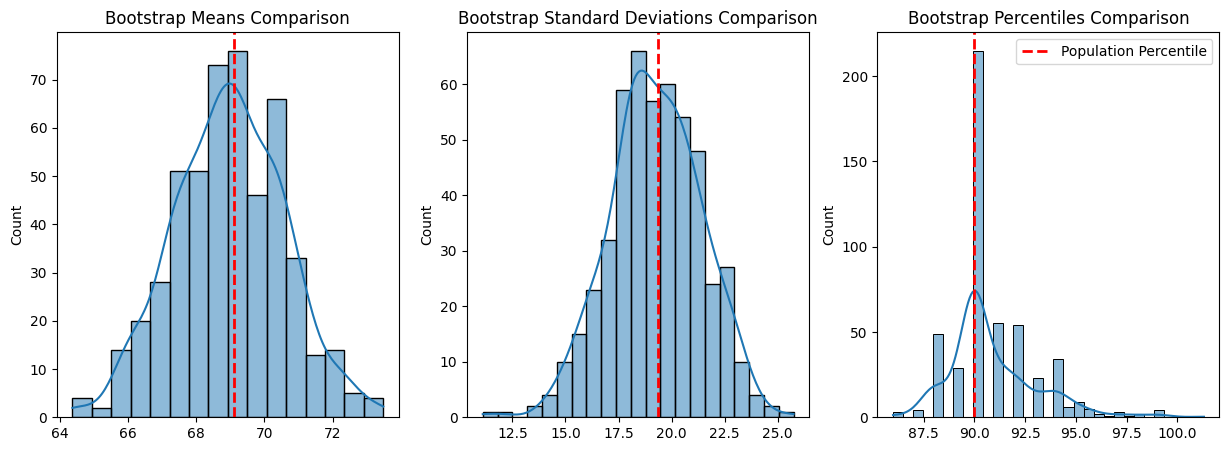

In [12]:
# Compare with population statistics
data_mean = diabetes_data['BloodPressure'].mean()
data_std = diabetes_data['BloodPressure'].std()
data_percentile = np.percentile(diabetes_data['BloodPressure'], 95)

# Plot comparison
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

sns.histplot(means, ax=axes[0], kde=True)
axes[0].axvline(data_mean, color='red', linestyle='dashed', linewidth=2, label='Population Mean')
axes[0].set_title('Bootstrap Means Comparison')

sns.histplot(stds, ax=axes[1], kde=True)
axes[1].axvline(data_std, color='red', linestyle='dashed', linewidth=2, label='Population Std')
axes[1].set_title('Bootstrap Standard Deviations Comparison')

sns.histplot(percentiles, ax=axes[2], kde=True)
axes[2].axvline(data_percentile, color='red', linestyle='dashed', linewidth=2, label='Population Percentile')
axes[2].set_title('Bootstrap Percentiles Comparison')

plt.legend()
plt.show()